GOAL2: Use the cleaned dataset with Pandas to perform EDA 

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from pyspark.sql import SparkSession
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

For the EDA part of the project we will use Pandas to handle the already cleaned dataset

In [2]:
# Import the csv file
df = pd.read_csv("../Clean_Data/2024/clean_dataset_legislative_2024.csv", sep=";")

In [3]:
# Show top 5 rows
df.head(5)

,Code_département,Libellé_département,Code_commune,Libellé_commune,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,...,Numéro_de_panneau_18,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats
0,1,Ain,1001,L'Abergement-Clémenciat,662,494,74.62,168,25.38,476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
1,1,Ain,1002,L'Abergement-de-Varey,228,187,82.02,41,17.98,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
2,1,Ain,1004,Ambérieu-en-Bugey,8745,5887,67.32,2858,32.68,5348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
3,1,Ain,1005,Ambérieux-en-Dombes,1337,979,73.22,358,26.78,926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
4,1,Ain,1006,Ambléon,98,65,66.33,33,33.67,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2


In [4]:
# Shape of the dataset
df.shape

(31392, 181)

The dataset has 181 different columns with unique and repeated informations for different candidates:
Unique columns:
- Code_département
- Libellé_département
- Code_commune
- Libellé_commune
- Inscrits
- Votants
- Pourcentage_Votants
- Abstentions
- Pourcentage_Abstentions
- Exprimés
- Pourcentage_Exprimés/inscrits
- Pourcentage_Exprimés/votants
- Blancs
- Pourcentage_Blancs/inscrits
- Pourcentage_Blancs/votants
- Nuls
- Pourcentage_Nuls/inscrits
- Pourcentage_Nuls/votants
- Nombre_candidats

Repeated columns (X being a value between 1 and 18):

- Numéro_de_panneau X
- Nuance_candidat X
- Nom_candidat X
- Prénom_candidat X
- Sexe_candidat X
- Voix_X
- Pourcentage_Voix/inscrits X
- Pourcentage_Voix/exprimés X
- Elu_X

In [5]:
# Perform data check
list_null_columns = [col for col in df.columns if df[col].isna().any()]

In [6]:
list_null_columns

['Numéro_de_panneau_2',
 'Nuance_candidat_2',
 'Nom_candidat_2',
 'Prénom_candidat_2',
 'Sexe_candidat_2',
 'Voix_2',
 'Pourcentage_Voix/inscrits_2',
 'Pourcentage_Voix/exprimés_2',
 'Numéro_de_panneau_3',
 'Nuance_candidat_3',
 'Nom_candidat_3',
 'Prénom_candidat_3',
 'Sexe_candidat_3',
 'Voix_3',
 'Pourcentage_Voix/inscrits_3',
 'Pourcentage_Voix/exprimés_3',
 'Numéro_de_panneau_4',
 'Nuance_candidat_4',
 'Nom_candidat_4',
 'Prénom_candidat_4',
 'Sexe_candidat_4',
 'Voix_4',
 'Pourcentage_Voix/inscrits_4',
 'Pourcentage_Voix/exprimés_4',
 'Numéro_de_panneau_5',
 'Nuance_candidat_5',
 'Nom_candidat_5',
 'Prénom_candidat_5',
 'Sexe_candidat_5',
 'Voix_5',
 'Pourcentage_Voix/inscrits_5',
 'Pourcentage_Voix/exprimés_5',
 'Numéro_de_panneau_6',
 'Nuance_candidat_6',
 'Nom_candidat_6',
 'Prénom_candidat_6',
 'Sexe_candidat_6',
 'Voix_6',
 'Pourcentage_Voix/inscrits_6',
 'Pourcentage_Voix/exprimés_6',
 'Numéro_de_panneau_7',
 'Nuance_candidat_7',
 'Nom_candidat_7',
 'Prénom_candidat_7',
 'S

The NULL values don't represent missing data but the fact the smaller cities dont have as much candidates as others

In [7]:
# reset_index: Converts the result (which is currently a Series with "Nombre_candidats" as the index) back into a DataFrame
count_by_candidates = df.groupby("Nombre_candidats").size().reset_index(name="Number of Cities")

In [8]:
count_by_candidates

,Nombre_candidats,Number of Cities
0,1,14
1,2,28026
2,3,3132
3,4,174
4,5,22
5,6,8
6,7,1
7,8,8
8,9,1
9,10,1


In [9]:
count_by_candidates = df.groupby("Nombre_candidats").agg(
    Number_of_Cities= ("Libellé_commune", "size"),
    Average_Inscrits = ("Inscrits", "mean")
).reset_index()

As we can see there are more candidates in cities with more people registered to vote (except for cities where there is just one candidate)

In [23]:
count_by_candidates

,Nombre_candidats,Number_of_Cities,Average_Inscrits
0,1,14,3548.857143
1,2,28026,1117.415471
2,3,3132,1901.227011
3,4,174,11015.637931
4,5,22,46795.181818
5,6,8,40157.375000
6,7,1,87289.000000
7,8,8,122088.125000
8,9,1,68957.000000
9,10,1,400366.000000


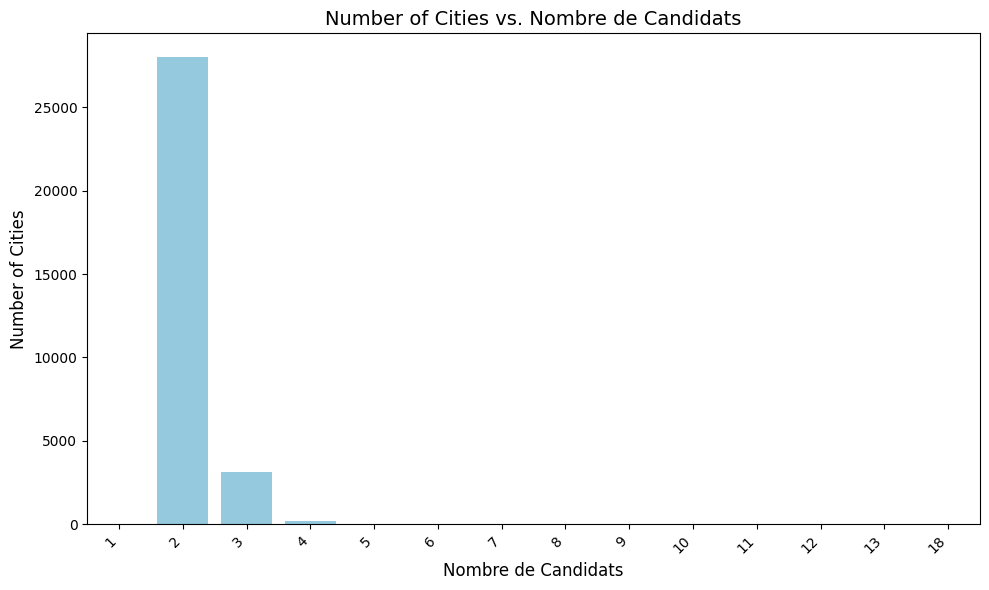

In [25]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x="Nombre_candidats", y="Number_of_Cities", data=count_by_candidates, color='skyblue')
plt.xlabel('Nombre de Candidats', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)
plt.title('Number of Cities vs. Nombre de Candidats', fontsize=14)

# Customize the appearance (optional)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()

The most second turn confrontations that happen are either duels or triangles

In [32]:
df[df["Nombre_candidats"] > 8]

,Code_département,Libellé_département,Code_commune,Libellé_commune,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,...,Numéro_de_panneau_18,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats
3167,13,Bouches-du-Rhône,13055,Marseille,400366,258783,64.64,141583,35.36,242247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,10
10580,31,Haute-Garonne,31555,Toulouse,196238,135652,69.13,60586,30.87,132891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12
12063,35,Ille-et-Vilaine,35238,Rennes,68957,48070,69.71,20887,30.29,47211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,9
14964,44,Loire-Atlantique,44109,Nantes,106987,73390,68.60,33597,31.40,71985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12
16184,49,Maine-et-Loire,49007,Angers,93562,62424,66.72,31138,33.28,60815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,11
20039,59,Nord,59350,Lille,122500,81459,66.50,41041,33.50,77341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,13
26004,75,Paris,75056,Paris,687417,459856,66.90,227561,33.10,435557,...,12.0,UG,ROSSET,Marine,FEMININ,21784.0,3.17,5.0,False,18


In big cities happen multiple confrontations because these cities have cut in different areas for the elections

In [27]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [28]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31392 entries, 0 to 31391
Columns: 181 entries, Code_département to Nombre_candidats
dtypes: bool(18), float64(78), int64(9), object(76)
memory usage: 39.6+ MB


In [29]:
# Check number of unique values
list_unique = df.nunique()

In [15]:
df.describe()

,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,Pourcentage_Exprimés/inscrits,Pourcentage_Exprimés/votants,Blancs,Pourcentage_Blancs/inscrits,...,Pourcentage_Voix/exprimés_16,Numéro_de_panneau_17,Voix_17,Pourcentage_Voix/inscrits_17,Pourcentage_Voix/exprimés_17,Numéro_de_panneau_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Nombre_candidats
count,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,...,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.00,1.0,31392.000000
mean,1380.240443,919.589673,72.605132,460.650771,27.394905,869.002071,68.256304,94.006233,38.069859,3.215389,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.117482
std,6682.696414,4331.296619,7.253418,2445.147631,7.253402,4114.293203,7.324949,3.952343,181.590414,2.377227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391799
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,1.000000
25%,169.000000,125.000000,69.130000,42.000000,23.290000,117.000000,64.540000,92.150000,4.000000,1.660000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.000000
50%,376.000000,272.000000,72.940000,100.000000,27.060000,255.000000,68.515000,94.830000,11.000000,2.700000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.000000
75%,935.000000,666.250000,76.710000,263.250000,30.870000,628.000000,72.470000,96.610000,28.000000,4.270000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.000000
max,687417.000000,459856.000000,100.000000,227561.000000,100.000000,435557.000000,100.000000,100.000000,18628.000000,46.150000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,18.000000


There are a lot of things that can be extracted from the statistics but we will take it features by features

What could be interesting is to visualize statistics about the genders in the candidates

# EDA for gender statistics (univariate analysis):


### First we have to get all the unique candidates

There are suppose to be: 1094 unique candidates in the second tour of this election according to the official website: https://www.vie-publique.fr/en-bref/294804-legislatives-2024-second-tour-les-6-et-7-juillet

In [216]:
df_unique_candidates = pd.concat([
                                 df['Nom_candidat_' + str(i)] + ' ' + 
                                 df['Prénom_candidat_' + str(i)] + ' - ' +
                                 df['Sexe_candidat_' + str(i)]
                                 for i in range(1, 19)], ignore_index=True)

# Drop any NaN values
df_unique_candidates.dropna(inplace=True)

# Split the combined data and keep only 'Nom_complet' and 'Sexe'
df_unique_candidates = df_unique_candidates.str.split(' - ', expand=True)
df_unique_candidates.columns = ['Nom_complet', 'Sexe']

# Count unique values considering Nom_complet and Sexe
unique_candidate_count = df_unique_candidates.drop_duplicates().shape[0] 

print("Number of unique candidates (with gender):", unique_candidate_count)

Number of unique candidates (with gender): 1094


In [221]:
df_unique_candidates = unique_candidate_count

In [222]:
df_unique_candidates.reset_index(drop=True, inplace=True)

In [223]:
df_unique_candidates.head(10)

,Nom_complet,Sexe
0,COQUELET Christophe,MASCULIN
1,PISANI Florence,FEMININ
2,GIVERNET Olga,FEMININ
3,KOTARAC Andréa,MASCULIN
4,MAÎTRE Christophe,MASCULIN
5,DIVE Julien,MASCULIN
6,RAY Nicolas,MASCULIN
7,MONNET Yannick,MASCULIN
8,BOVET Jorys,MASCULIN
9,GIRARD Christian,MASCULIN


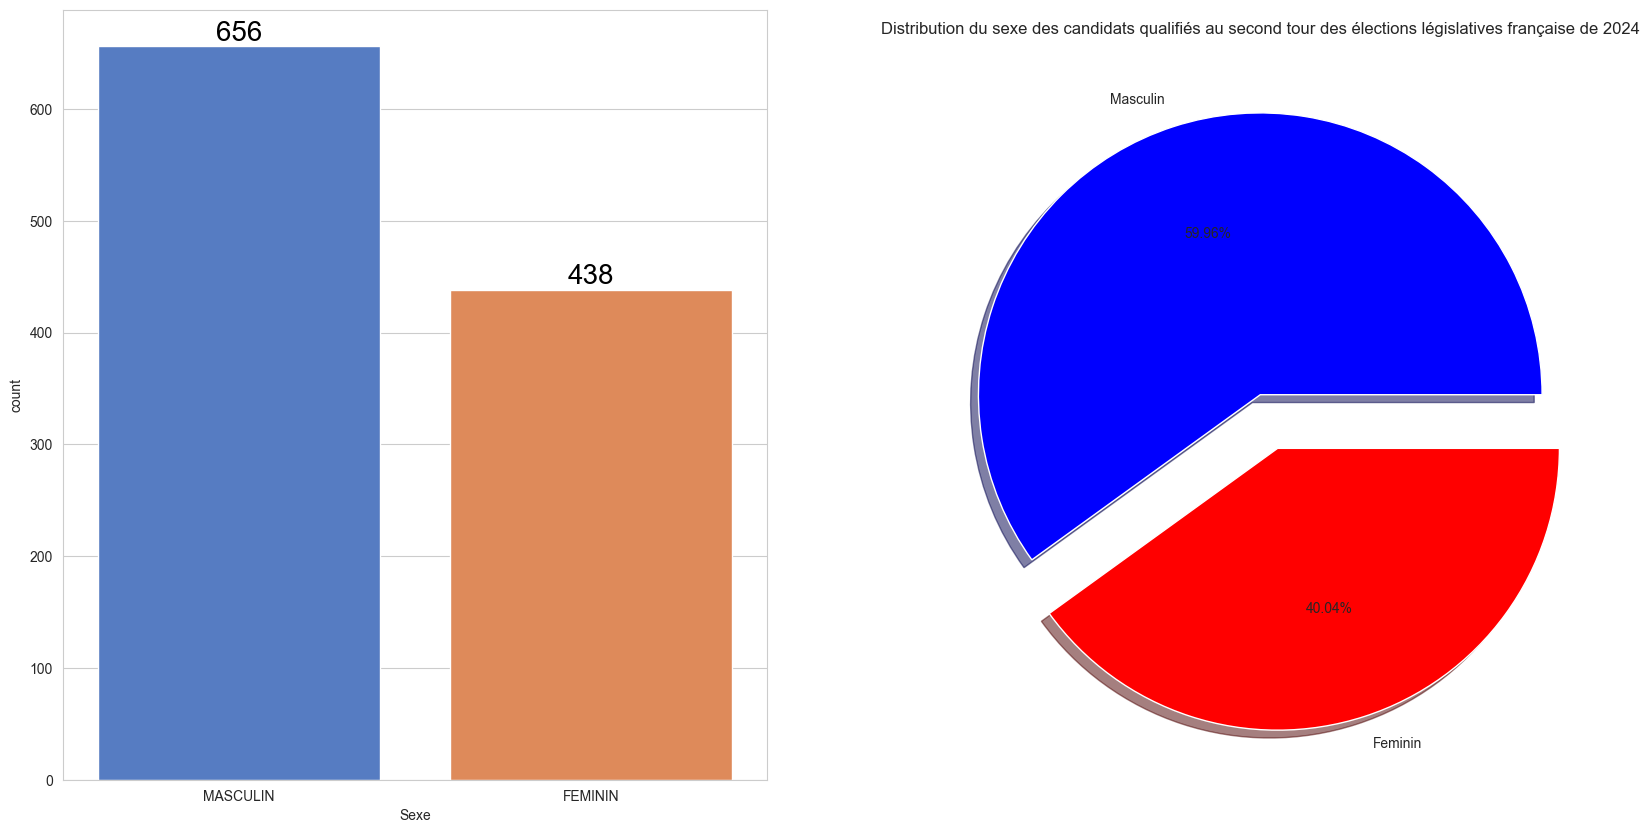

In [224]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.title("Distribution du sexe des candidats qualifiés au second tour des élections législatives française de 2024")
sns.countplot(x=df_unique_candidates['Sexe'], data=df_unique_candidates, palette ='muted', ax=ax[0], saturation=0.8, stat="count")
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df_unique_candidates['Sexe'].value_counts(),labels=['Masculin','Feminin'], explode=[0,0.2], autopct='%2.2f%%', shadow=True, colors=['blue','red'])
plt.show()